# OBJECTIVE : The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls.  Often, more than one contact to the same client was required, in order to access if the product (bank term deposit)would be ('yes') or not ('no') subscribed.

# Import the neccessary modules for data manipulation and visual representation

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score

In [95]:
bank=pd.read_csv(r"C:\Users\DELL\Desktop\bankmarketing.csv",sep=";")
bank.shape# tells the no of rows and cols (41188 rows and 13 cols)

(41188, 21)

# Check to see if there are any missing values in our data set

In [96]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [97]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [98]:
# Information about attribute type

In [99]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [100]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [101]:
# Statistical description of numeric dataset attributes

In [102]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [103]:
# Removing Duplicate Values

print(bank.duplicated().sum()) # 12 duplicate values 
bank = bank.drop_duplicates() # Values have been removed


12


In [104]:
# Outliers are mainly found in our target column: y. No changes will need to be made.

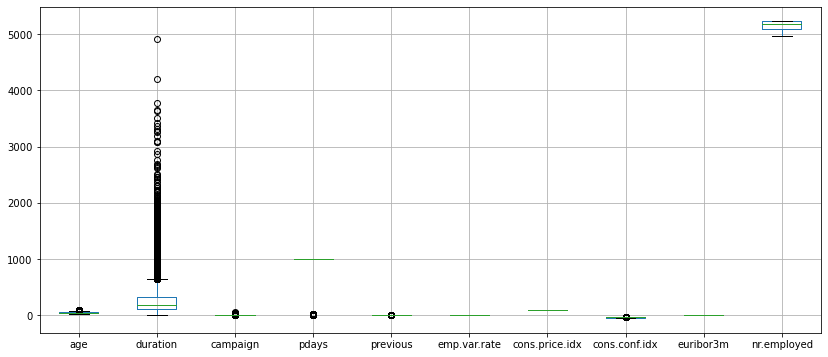

In [105]:
plt.figure(figsize=(14,6))
bank.boxplot()
print()

In [106]:
#Removing outliers in 'duration' using IQR method.

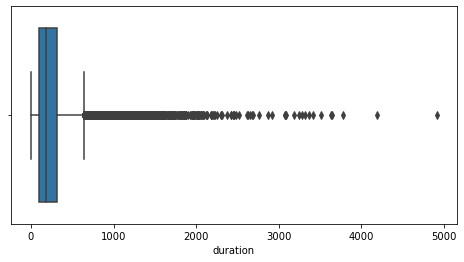

In [107]:
 plt.figure(figsize=(8, 4))
sns.boxplot(x=bank['duration'])
plt.show()

In [108]:
Q1 = bank['duration'].quantile(.25)
Q3 = bank['duration'].quantile(.75)

Q1,Q3

(102.0, 319.0)

In [109]:
IQR = Q3 - Q1
IQR

217.0

In [110]:
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

lower,upper

(-223.5, 644.5)

In [111]:
#Defining lower / upper outliers

In [112]:
bank = bank[bank['duration'] >= lower]
bank = bank[bank['duration'] <= upper]

In [113]:
# There were 41188 records. Now, we have 38213 records.
bank.shape

(38213, 21)

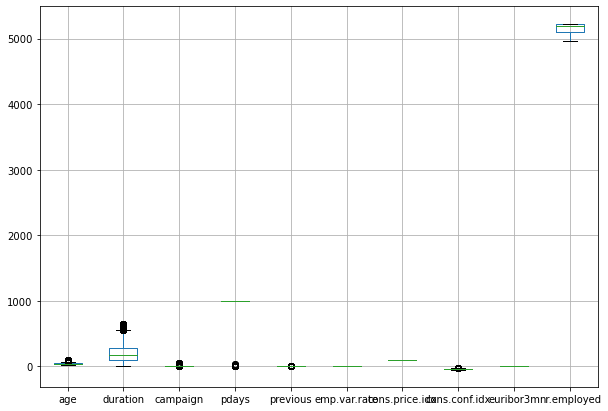

In [114]:
plt.figure(figsize=(10,7))
bank.boxplot()
print()

In [115]:
#Correlations

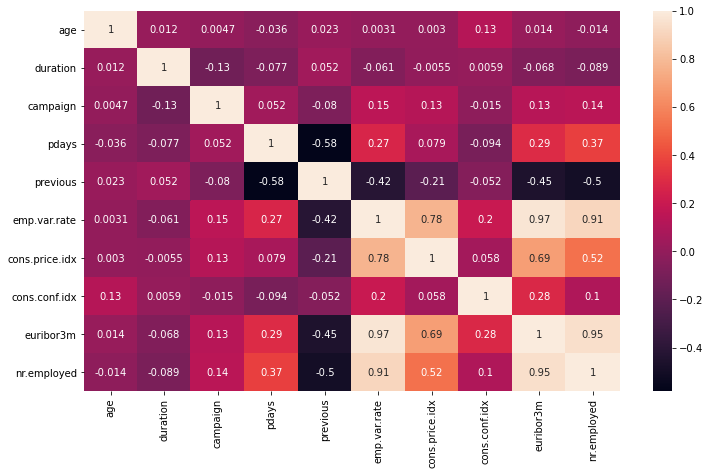

In [116]:
# Correlation between columns

plt.figure(figsize=(12,7))
correlation = bank.corr()
sns.heatmap(correlation, annot = True);


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


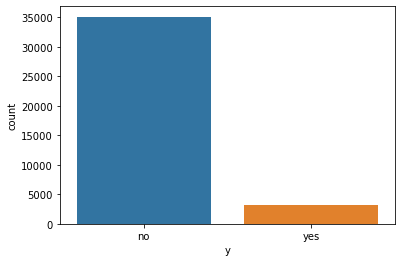

In [117]:
sns.countplot(bank['y']);

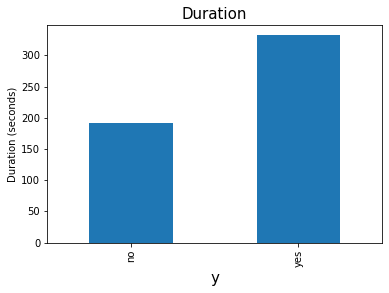

y
no     191.856724
yes    331.967234
Name: duration, dtype: float64


In [118]:
time = bank.groupby('y').duration.mean()
time.plot.bar()
plt.title('Duration', fontsize = 15)
plt.xlabel('y', fontsize = 15)
plt.ylabel('Duration (seconds)')
plt.show()

print(time)


In [119]:
#In which month do customers usually make the most deposits?
#May is the month when most customers make a term deposit

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


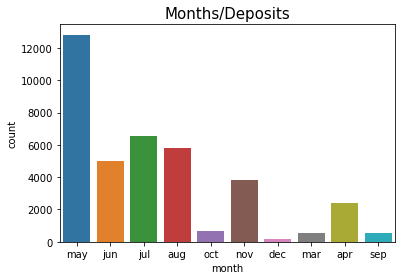

In [120]:
plt.title('Months/Deposits', fontsize = 15)
sns.countplot(bank['month'])
plt.show()


In [121]:
#Among those who made bank deposits, what was the main form of contact?
#The main form of contact is the cellular. Few customers who made term bank deposits were contacted by telephone.

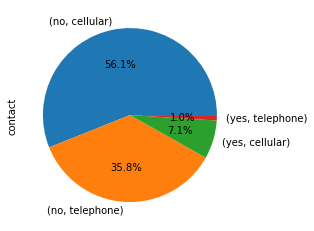

In [122]:
bank.groupby('y').contact.value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

In [123]:
#What is the Age Distribution of Customers?
#Between 25 and 42 years old.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


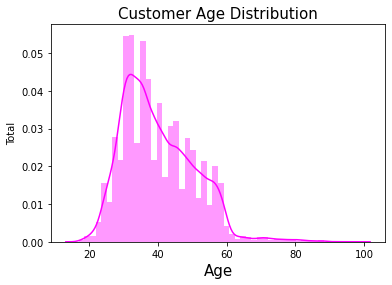

In [124]:
sns.distplot(bank['age'], color = 'magenta')
plt.title('Customer Age Distribution', fontsize = 15)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Total')
plt.show()


In [125]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [126]:
bank[bank.select_dtypes(include=['object']).columns] = bank[bank.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [127]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


# SAMPLING

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
bank_train, bank_test = train_test_split(bank, test_size=.2)

In [130]:

bank_train_x= bank_train.iloc[:,0:-1] #[independent features]
bank_train_y=bank_train.iloc[:,-1] #[targeted variable]

bank_test_x= bank_test.iloc[:,0:-1] #[dependent features ]
bank_test_y=bank_test.iloc[:,-1]

In [131]:
bank_train_x.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
23517,33,0,1,6,0,0,0,0,1,2,137,5,999,0,1,1.4,93.444,-36.1,4.962,5228.1
13412,41,10,2,3,0,2,0,0,3,4,156,1,999,0,1,1.4,93.918,-42.7,4.962,5228.1
7584,32,9,1,5,0,2,0,1,6,0,322,2,999,0,1,1.1,93.994,-36.4,4.864,5191.0
21243,35,3,2,5,0,2,2,0,1,1,111,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1
31054,38,9,1,6,0,2,0,0,6,4,147,1,999,0,1,-1.8,92.893,-46.2,1.334,5099.1


In [132]:
bank_train_y.head()

23517    0
13412    0
7584     0
21243    0
31054    0
Name: y, dtype: int32

In [133]:
bank_test_x.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
13919,38,2,1,2,0,2,0,0,3,0,188,2,999,0,1,1.4,93.918,-42.7,4.963,5228.1
36292,36,0,1,6,0,0,0,0,4,1,174,1,3,1,2,-2.9,92.963,-40.8,1.266,5076.2
2612,28,0,1,3,0,0,0,1,6,3,337,6,999,0,1,1.1,93.994,-36.4,4.856,5191.0
11202,42,2,1,2,1,0,0,1,4,2,143,1,999,0,1,1.4,94.465,-41.8,4.961,5228.1
29955,40,0,2,6,0,2,2,0,0,1,8,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1


In [134]:
bank_test_y.head()

13919    0
36292    1
2612     0
11202    0
29955    0
Name: y, dtype: int32

In [135]:
#Model Building

# LOGISTIC REGRESSION

In [136]:
from sklearn.linear_model import LogisticRegression

In [137]:
log_reg = LogisticRegression()
log_reg.fit(bank_train_x,bank_train_y)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [138]:
pred_test  = log_reg.predict(bank_test_x)
pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [139]:
from sklearn.metrics import confusion_matrix

In [140]:
tab1 = confusion_matrix(pred_test,bank_test_y)
tab1

array([[6884,  401],
       [ 129,  229]], dtype=int64)

In [141]:
acc_logreg = accuracy_score(pred_test , bank_test_y)*100
acc_logreg

93.06555017663221

In [142]:
from sklearn.metrics import roc_auc_score #for findinng the area under the curve
from sklearn.metrics import roc_curve

In [143]:
pred_test=log_reg.predict(bank_test_x)
log_roc_auc=roc_auc_score(bank_test_y,pred_test)
log_roc_auc

0.6725488265556709

In [144]:
pred_value_proba=log_reg.predict_proba(bank_test_x)
pred_value_proba=pred_value_proba[:,1]
fpr,tpr,threshold=roc_curve(bank_test_y,pred_value_proba)

Text(0.5, 1.0, 'AUROC')

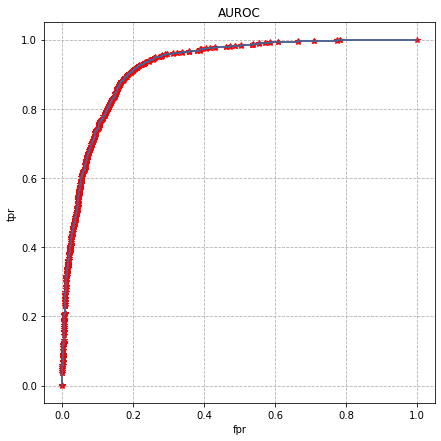

In [145]:
fig = plt.figure(figsize=(7,7))
plt.grid(linestyle="--")
plt.plot(fpr,tpr,marker='*',color='r')
plt.plot(fpr,tpr)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("AUROC")

# NAIVE BAYES

In [146]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

In [147]:
numerical = bank_train_x.select_dtypes(exclude=['object']).columns

In [148]:
bank_train_x[numerical] = minmax.fit_transform(bank_train_x[numerical])

In [149]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [150]:
nb.fit(bank_train_x , bank_train_y)

MultinomialNB()

In [151]:
pred_nb = nb.predict(bank_test_x)
pred_nb

array([0, 0, 0, ..., 0, 0, 0])

In [152]:
tab_nb = confusion_matrix(pred_nb , bank_test_y)
tab_nb

array([[7013,  630],
       [   0,    0]], dtype=int64)

In [153]:
acc_nb = (accuracy_score(pred_nb , bank_test_y))*100
acc_nb

91.75716341750622

# Random Forest Classifier

In [154]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(bank_train_x,bank_train_y)

RandomForestClassifier()

In [155]:
from sklearn.ensemble import AdaBoostClassifier
rfc = AdaBoostClassifier(rfc, n_estimators = 20)

In [156]:
rfc.fit(bank_train_x, bank_train_y)

AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=20)

In [157]:
pred_rfc = rfc.predict(bank_test_x)

In [158]:
tab_rfc = confusion_matrix(pred_rfc , bank_test_y)
tab_rfc 

array([[6600,  487],
       [ 413,  143]], dtype=int64)

In [159]:
acc_rf = (accuracy_score(pred_rfc , bank_test_y))*100
acc_rf

88.22451916786602

In [160]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(bank_train_x,bank_train_y)

DecisionTreeClassifier()

In [161]:
pred_dl_dt=dt.predict(bank_test_x)

In [162]:
tab_dl_dt=confusion_matrix(pred_dl_dt,bank_test_y)
tab_dl_dt

array([[  54,   48],
       [6959,  582]], dtype=int64)

In [163]:
acc_dt= accuracy_score(pred_dl_dt , bank_test_y)*100
acc_dt

8.321339788041344

In [164]:
dt.feature_importances_

array([0.09976238, 0.03879823, 0.01701405, 0.03337186, 0.00617789,
       0.0180263 , 0.01492431, 0.00847316, 0.02061176, 0.03882058,
       0.25835791, 0.03541557, 0.03003723, 0.01153257, 0.0140435 ,
       0.0037976 , 0.01803545, 0.0334709 , 0.07901644, 0.2203123 ])

In [165]:
dt.feature_importances_.sum()

1.0

In [166]:
feature_importance=pd.DataFrame({"Features":bank_train_x.columns,"Score":dt.feature_importances_})
feature_importance

,Features,Score
0,age,0.099762
1,job,0.038798
2,marital,0.017014
3,education,0.033372
4,default,0.006178
5,housing,0.018026
6,loan,0.014924
7,contact,0.008473
8,month,0.020612
9,day_of_week,0.038821


In [167]:
feature_importance.sort_values("Score",ascending=False)

,Features,Score
10,duration,0.258358
19,nr.employed,0.220312
0,age,0.099762
18,euribor3m,0.079016
9,day_of_week,0.038821
1,job,0.038798
11,campaign,0.035416
17,cons.conf.idx,0.033471
3,education,0.033372
12,pdays,0.030037


# SVM

In [168]:
from sklearn.svm import SVC

In [169]:
svc = SVC(kernel = 'linear')

In [170]:
svc.fit(bank_train_x , bank_train_y)

SVC(kernel='linear')

In [171]:
pred_svm = svc.predict(bank_test_x)
pred_svm

array([0, 0, 0, ..., 0, 0, 0])

In [172]:
tab_svm = confusion_matrix(pred_svm , bank_test_y)
tab_svm

array([[7013,  630],
       [   0,    0]], dtype=int64)

In [173]:
acc_svm = accuracy_score(pred_svm , bank_test_y)*100
acc_svm

91.75716341750622

In [174]:
from sklearn.svm import SVC
svc=SVC(kernel='sigmoid') #kernels are the hyperparameters
svc.fit(bank_test_x,bank_test_y )
pred_svm=svc.predict(bank_test_x)
tab_svm=confusion_matrix(pred_svm,bank_test_y )
tab_svm

array([[7013,  630],
       [   0,    0]], dtype=int64)

# KNN

In [175]:
from sklearn.neighbors import KNeighborsClassifier

In [176]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [177]:
knn_classifier.fit(bank_train_x,bank_train_y)

KNeighborsClassifier()

In [178]:
pred_knn = knn_classifier.predict(bank_test_x)
pred_knn

array([0, 1, 0, ..., 0, 0, 0])

In [179]:
tab_knn = confusion_matrix(pred_knn , bank_test_y)
tab_knn

array([[6902,  622],
       [ 111,    8]], dtype=int64)

In [180]:
acc_knn = accuracy_score(pred_knn , bank_test_y)*100
acc_knn

90.40952505560644

In [181]:
results = pd.DataFrame([
    {'Algorithm' : 'Naive Bayes', 'Accuracy' : acc_nb},
    {'Algorithm' : 'Logistic Regression', 'Accuracy' : acc_logreg},
    {'Algorithm' : 'Random Forest', 'Accuracy' : acc_rf},
    {'Algorithm' : 'Decision Tree', 'Accuracy' : acc_dt},
    {'Algorithm' : 'Support Vector Machine', 'Accuracy' : acc_svm},
{'Algorithm' : 'KNN', 'Accuracy' : acc_knn}])

results.sort_values(by=['Accuracy'], ascending=False)

,Algorithm,Accuracy
1,Logistic Regression,93.065550
0,Naive Bayes,91.757163
4,Support Vector Machine,91.757163
5,KNN,90.409525
2,Random Forest,88.224519
3,Decision Tree,8.321340
